
Hasil Prediksi Penyebaran HIV/AIDS:

                  Tahun_0     Tahun_1     Tahun_2     Tahun_3  \
Kota Bandung        190.0  205.518668  221.797366  239.345475   
Bogor               139.0  150.206415  162.039474  174.704901   
Indramayu           135.0  145.741510  157.131992  169.201118   
Majalengka          116.0  125.400641  135.418452  146.278233   
Kota Bekasi          99.0  106.925939  115.553999  124.658582   
Kota Bogor           92.0   99.507846  107.451200  116.085117   
Cirebon              83.0   89.630828   97.107400  105.104645   
Garut                79.0   85.336989   92.252972   99.933687   
Kota Depok           79.0   85.148091   92.060009   99.361117   
Bekasi               56.0   60.463971   65.133948   70.232571   
Karawang             55.0   59.420268   64.129167   69.363008   
Kota Cirebon         52.0   56.193337   60.529786   65.372667   
Kota Sukabumi        46.0   49.697066   53.703387   57.965905   
Cianjur              45.0   48.508872   52.389819   

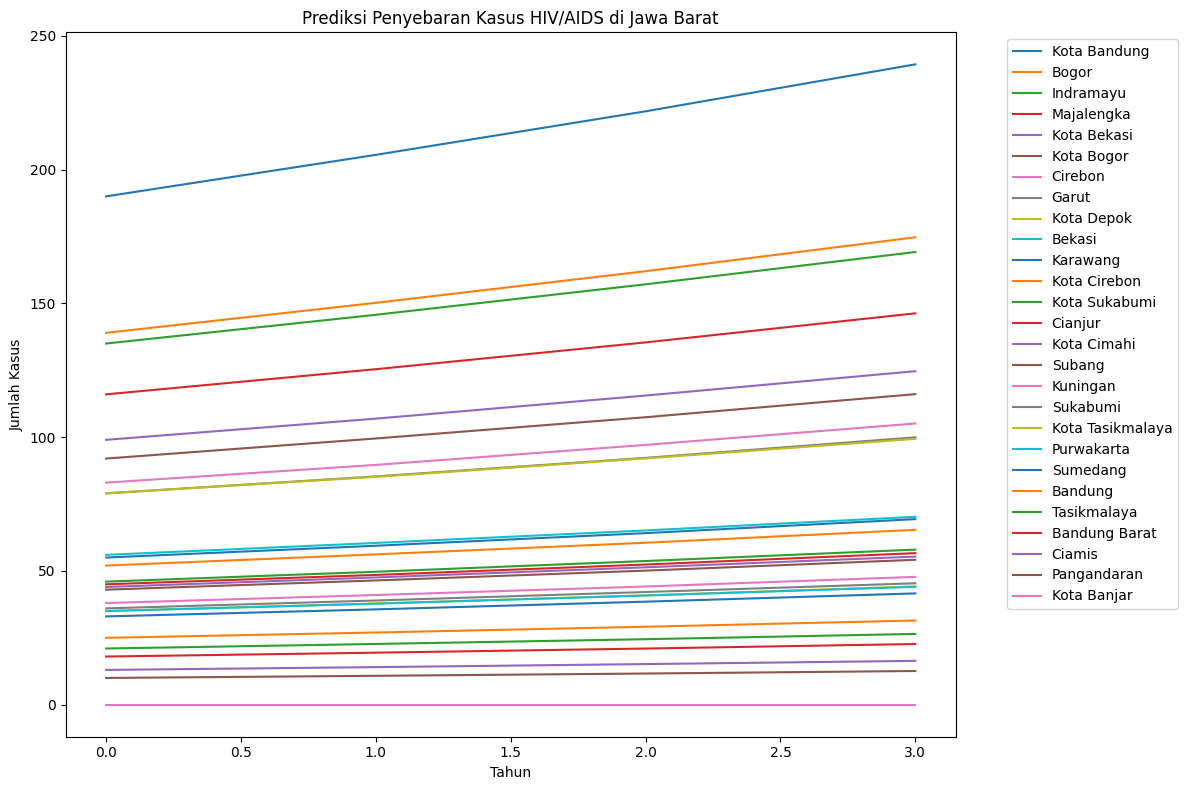

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data awal kasus AIDS Januari-September 2023
initial_data = {
    'Wilayah': ["Kota Bandung", "Bogor", "Indramayu", "Majalengka", "Kota Bekasi", "Kota Bogor", "Cirebon", "Garut", "Kota Depok", "Bekasi", "Karawang", "Kota Cirebon", "Kota Sukabumi", "Cianjur", "Kota Cimahi", "Subang", "Kuningan", "Sukabumi", "Kota Tasikmalaya", "Purwakarta", "Sumedang", "Bandung", "Tasikmalaya", "Bandung Barat", "Ciamis", "Pangandaran", "Kota Banjar"],
    'Kasus_AIDS': [190, 139, 135, 116, 99, 92, 83, 79, 79, 56, 55, 52, 46, 45, 44, 43, 38, 36, 35, 35, 33, 25, 21, 18, 13, 10, 0]
}

# Konversi ke DataFrame
data = pd.DataFrame(initial_data)

# Parameter simulasi
n_tahun = 3  # Prediksi 3 tahun ke depan
n_simulasi = 1000  # Jumlah iterasi Monte Carlo
pertumbuhan_min = 0.01  # Pertumbuhan minimum (1%)
pertumbuhan_max = 0.15  # Pertumbuhan maksimum (15%)

# Simulasi Monte Carlo
np.random.seed(42)
simulasi_hasil = {}

for wilayah in data['Wilayah']:
    kasus_awal = data[data['Wilayah'] == wilayah]['Kasus_AIDS'].values[0]
    hasil_simulasi = []

    for _ in range(n_simulasi):
        kasus = kasus_awal
        kasus_tahunan = [kasus]
        for _ in range(n_tahun):
            pertumbuhan = np.random.uniform(pertumbuhan_min, pertumbuhan_max)
            kasus = kasus * (1 + pertumbuhan)
            kasus_tahunan.append(kasus)
        hasil_simulasi.append(kasus_tahunan)
    simulasi_hasil[wilayah] = np.mean(hasil_simulasi, axis=0)

# Membuat DataFrame hasil simulasi
hasil_df = pd.DataFrame(simulasi_hasil).T
hasil_df.columns = ['Tahun_0', 'Tahun_1', 'Tahun_2', 'Tahun_3']

# Menambahkan persentase kenaikan
hasil_df['Persentase_Kenaikan'] = ((hasil_df['Tahun_3'] - hasil_df['Tahun_0']) / hasil_df['Tahun_0']) * 100

# Tabel hasil
print("\nHasil Prediksi Penyebaran HIV/AIDS:\n")
print(hasil_df)

# Visualisasi hasil simulasi
plt.figure(figsize=(12, 8))
for wilayah in hasil_df.index:
    plt.plot(range(n_tahun + 1), hasil_df.loc[wilayah, ['Tahun_0', 'Tahun_1', 'Tahun_2', 'Tahun_3']], label=wilayah)

plt.title("Prediksi Penyebaran Kasus HIV/AIDS di Jawa Barat")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kasus")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Menyimpan hasil simulasi ke file CSV
hasil_df.to_csv("hasil_simulasi_hiv_aids.csv")
